# Bagging - Regression

## 보스톤 집값 예측

### 패키지 로딩

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

### 데이터 로드 및 확인

In [9]:
boston = pd.read_csv('./데이터셋/HousingData.csv')
boston.ffill(inplace=True) # 결측치 채우기
print(boston.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 데이터 분할

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,2.94,36.2


In [11]:
x = boston.drop('MEDV',axis=1)
y = boston['MEDV']

In [13]:
scaled_x = StandardScaler().fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=10)

### 모델 생성 및 검증

In [15]:
model = RandomForestRegressor(n_estimators=200, random_state=0) # n_estimators 는 트리의 갯수, 데이터 샘플링시 사용되는 시드값
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [17]:
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test,y_hat):.3f}')
print(f'RMSE:{np.sqrt(mean_absolute_error(y_test,y_hat)):.3f}')
print(f'R2SCORE:{r2_score(y_test,y_hat):.3f}')

MAE:2.534
RMSE:1.592
R2SCORE:0.872


In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

y_hat = lm.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test,y_hat):.3f}')
print(f'RMSE:{np.sqrt(mean_absolute_error(y_test,y_hat)):.3f}')
print(f'R2SCORE:{r2_score(y_test,y_hat):.3f}')

MAE:3.684
RMSE:1.919
R2SCORE:0.698


### 파라메터 튜닝

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[10,20,50,100,200,300],
    'bootstrap':[True,False],
    'max_features':[2,4,6,8,13]
}
model = RandomForestRegressor()
gs = GridSearchCV(model,params, cv=5,scoring='neg_mean_squared_error')
gs.fit(scaled_x, y)
print(f'최적 파라메터 조합:',gs.best_params_)

최적 파라메터 조합: {'bootstrap': True, 'max_features': 6, 'n_estimators': 300}


In [25]:
y_hat = gs.best_estimator_.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test,y_hat):.3f}')
print(f'RMSE:{np.sqrt(mean_absolute_error(y_test,y_hat)):.3f}')
print(f'R2SCORE:{r2_score(y_test,y_hat):.3f}')

MAE:0.904
RMSE:0.951
R2SCORE:0.982


# Bagging - Classifier

## 와인 품종 분류

### 패키지로딩

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, classification_report

import numpy as np
import pandas as pd

### 데이터 로딩 및 확인

In [2]:
wine = load_wine()
#print(wine.DESCR)
x = wine.data
y = wine.target
df = pd.DataFrame(x, columns=wine.feature_names)
df['class'] = y
display(df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
print(df['class'].value_counts())

class
1    71
0    59
2    48
Name: count, dtype: int64


In [4]:
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

### 데이터 분할

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaled_x = MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.3,random_state=0,stratify=y)

### 모델생성
- RandomForestClassifier 파라메터
  - bootstrap : 부트스트랩 사용여부(default=True), True면 복원 추출된 샘플로 학습하고 False면 표본 전체를 이용하여 학습
  - criterion : 트리 분할에 사용할 알고리즘 (entropy, Gini)
  - max_depth : 나무의 최대 깊이
  - min_samples split: 노드를 분할하는데 필요한 최소 샘플 수
  - n_estimators : 사용할 트리의 개수(default = 100)

In [6]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

### 모델 평가

In [7]:
y_hat = model.predict(x_test)
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
report = classification_report(y_test, y_hat)
print(report)

정확도: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [8]:
model = RandomForestClassifier(n_estimators=400, min_samples_split=3)
model.fit (x_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=400)

### 트리 시각화

In [11]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [16]:
from sklearn.tree import export_graphviz
estimator = model.estimators_[0]
export_graphviz(estimator, out_file='tree.dot',
                feature_names=wine.feature_names,
               class_names=wine.target_names,
               precision=3, # 소수점 정밀도
               filled=True, # class별 노드의 색채우기
                rounded=True, # 노드의 박스 모양을 둥굴게
               )

- graphviz 패키지 설치

In [14]:
#!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00


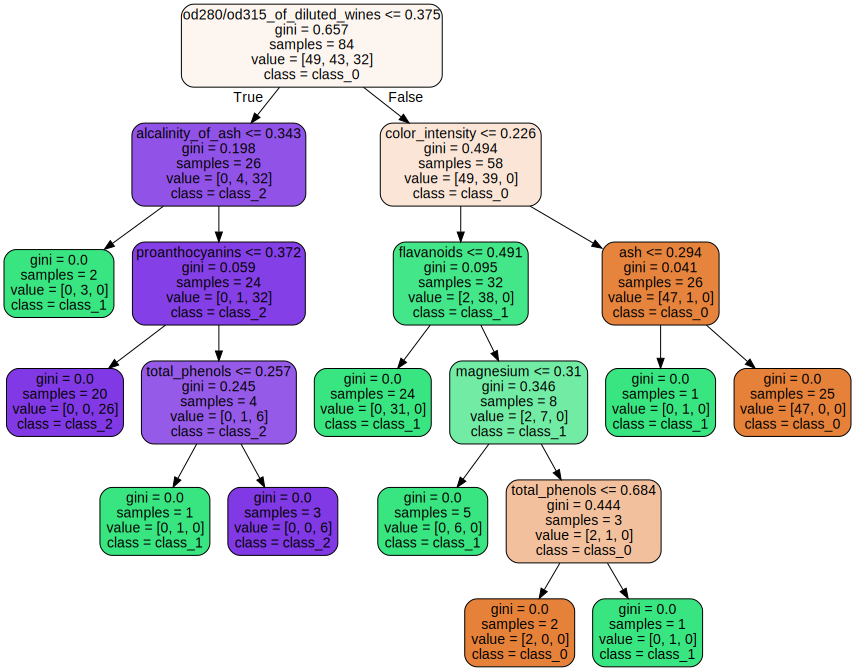

In [20]:
import graphviz
with open ('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


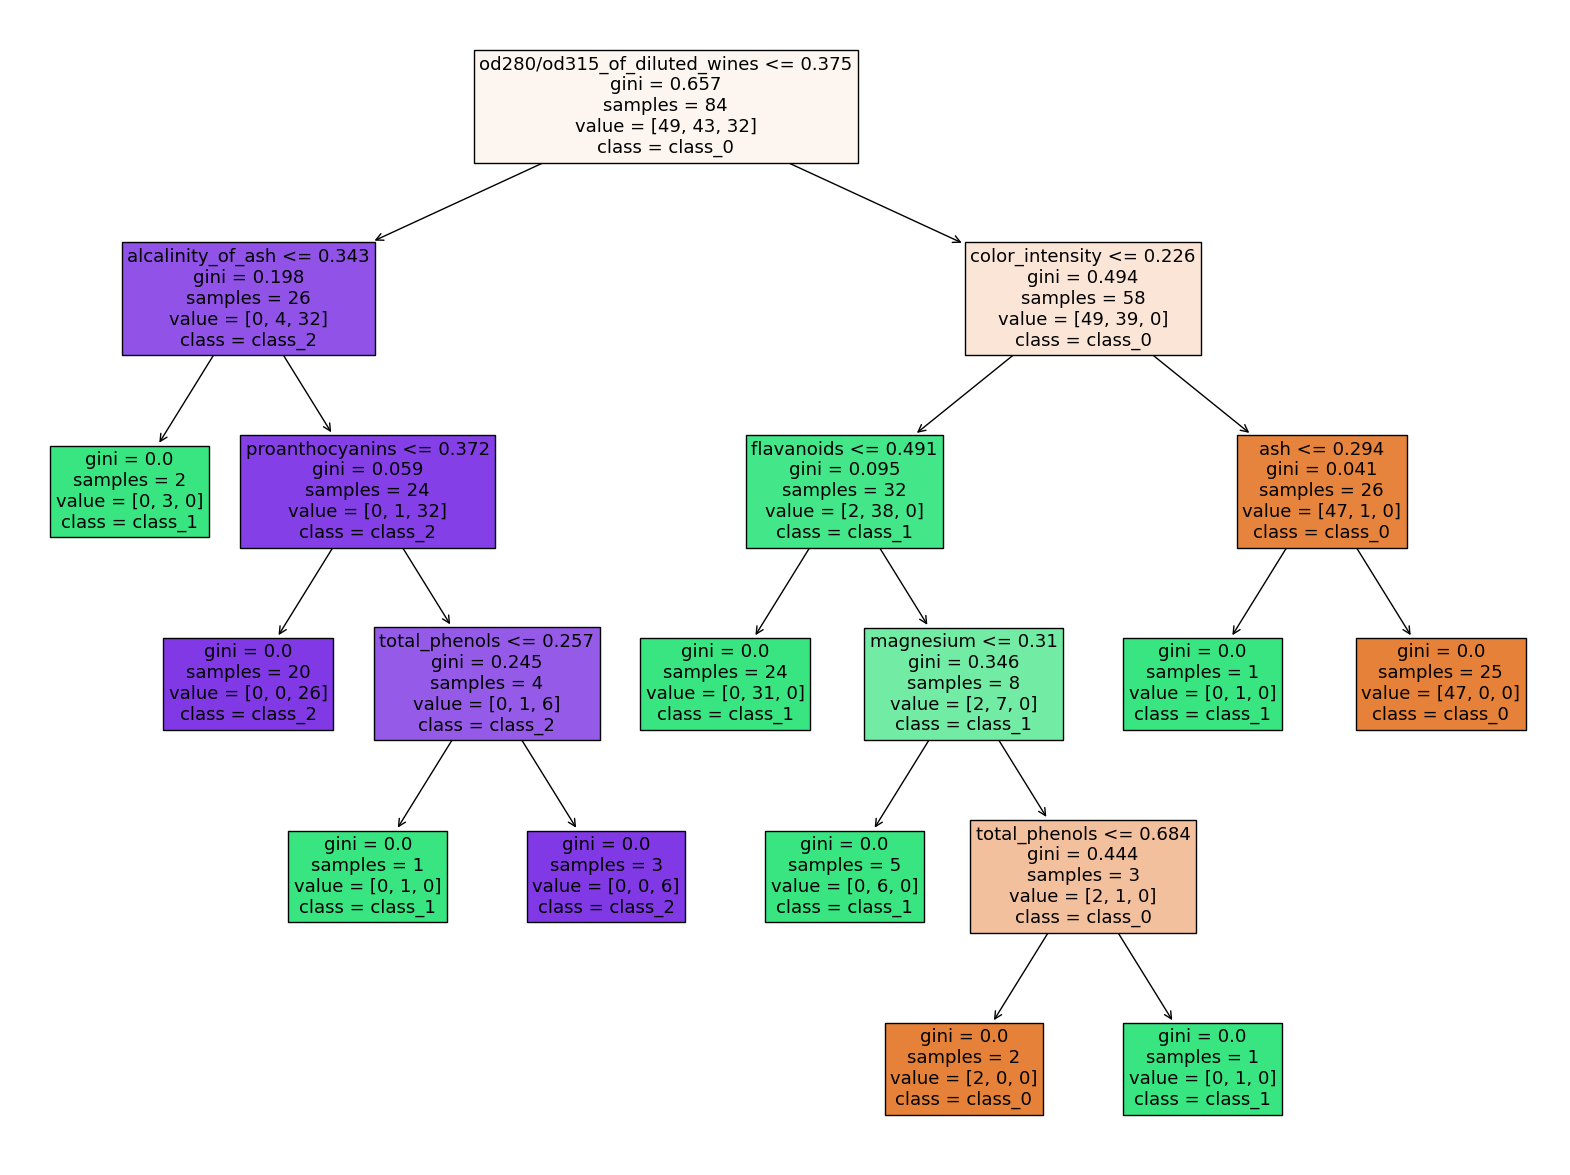

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(estimator,
         feature_names=wine.feature_names,
         class_names=wine.target_names,
         filled=True,
         fontsize=13)
plt.show()

### 하이퍼 파라미터 튜닝

In [22]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[3,5,8,12,15,20],
    'min_samples_split':[2,3,6,20,25],
    'criterion':['gini','entropy']
}
model = RandomForestClassifier()
gs = GridSearchCV(model, params, cv=5, scoring='accuracy')
gs.fit(scaled_x,y)
print('최적의 파라미터:', gs.best_params_)
print('최적의 파라미터 정확도:',gs.best_score_)

최적의 파라미터: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}
최적의 파라미터 정확도: 0.9833333333333332


In [23]:
best_estimator = gs.best_estimator_
y_hat = best_estimator.predict(x_test)
print(f'정확도:{accuracy_score(y_test, y_hat):.3f}')

정확도:1.000


### Feature Importance
- 의사결정나무 알고리즘이 학습할때, 피처의 중요도를 나타내는 지표
- 일반적으로 값이 높을수록 해당 피처의 중요도가 높

In [26]:
print(estimator.feature_importances_)

[0.         0.         0.02403814 0.06348178 0.02182186 0.03740891
 0.00845597 0.         0.00276316 0.46243438 0.         0.3795958
 0.        ]


In [36]:
importance = { k:v for k,v in zip(wine.feature_names, estimator.feature_importances_)}
df_importance = pd.DataFrame(pd.Series(importance), columns = ['Importance'])
df_importance = df_importance.sort_values('Importance', ascending=False)
display(df_importance)

,Importance
color_intensity,0.462434
od280/od315_of_diluted_wines,0.379596
alcalinity_of_ash,0.063482
total_phenols,0.037409
ash,0.024038
magnesium,0.021822
flavanoids,0.008456
proanthocyanins,0.002763
alcohol,0.000000
malic_acid,0.000000


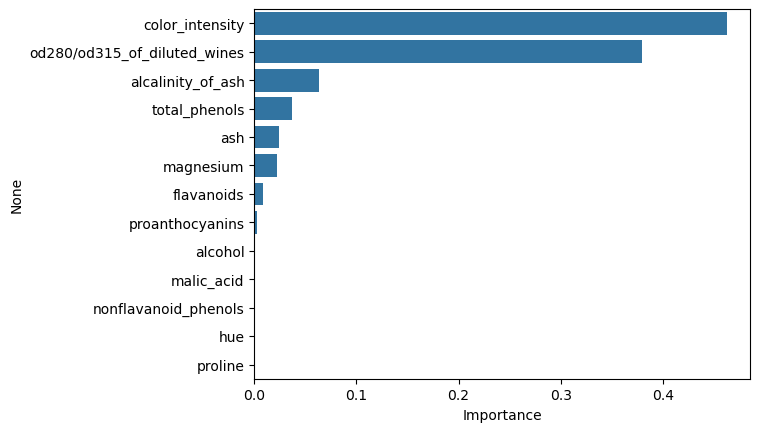

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.barplot(data = df_importance,x='Importance', y=df_importance.index)
plt.show()